In [1]:
# Set up packages for lecture. Don't worry about understanding this code, but
# make sure to run it if you're following along.
import numpy as np
import babypandas as bpd
import pandas as pd
from matplotlib_inline.backend_inline import set_matplotlib_formats
%reload_ext pandas_tutor
%set_pandas_tutor_options {'projectorMode': True}
set_matplotlib_formats("svg")

np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option("display.max_rows", 7)
pd.set_option("display.max_columns", 8)
pd.set_option("display.precision", 2)

# Lecture 7 –  Data Visualization 📈
## DSC 10, Summer 2022

### Announcements

- Homework 2 is due on **Sat 7/16 at 11:59pm**.
- Lab 3 is due on **Tue, 7/19 at 11:59pm**.
- Watch the [supplemental video](https://youtu.be/xg7rnjWnZ48) for Lecture 6 with answers to the challenge problems.
- Come to OH if you want help with the lab and homework problems!

### Agenda

- Why visualize?
- Terminology.
- Scatter plots.
- Line plots.
- Bar charts.

**Note:** Don't forget about the [resources](https://dsc10.com/resources) tab of the course website!

Run the next 3 cells, don't worry about their content.

In [2]:
# Run this cell.
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use('fivethirtyeight')

from IPython.display import HTML, display, IFrame

In [3]:
chapters = open('data/lw.txt').read().split('CHAPTER ')[1:]

In [4]:
# Counts of names in the chapters of Little Women

counts = bpd.DataFrame().assign(
    Amy=np.char.count(chapters, 'Amy'),
    Beth=np.char.count(chapters, 'Beth'),
    Jo=np.char.count(chapters, 'Jo'),
    Meg=np.char.count(chapters, 'Meg'),
    Laurie=np.char.count(chapters, 'Laurie'),
)

# cumulative number of times each name appears

lw_counts = bpd.DataFrame().assign(
    Amy=np.cumsum(counts.get('Amy')),
    Beth=np.cumsum(counts.get('Beth')),
    Jo=np.cumsum(counts.get('Jo')),
    Meg=np.cumsum(counts.get('Meg')),
    Laurie=np.cumsum(counts.get('Laurie')),
    Chapter=np.arange(1, 48, 1)
)

## Why visualize?

### Little Women

- Who is the main character?
- Which pair of characters gets married in Chapter 35?

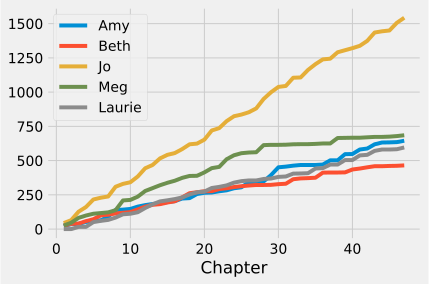

In [5]:
lw_counts.plot(x='Chapter');

### Napoleon's March

<center><img src="./data/minard.jpg"/></center>

### John Snow

<center><img src='data/map.jpg'></center>

### Why visualize?

- Lets you understand lots of data quickly.
- Visualizations make it easier to spot trends, gather insight, and communicate our results to others.
- There are many types of visualizations: scatter plots, line plot, bar charts, etc.
    - The right choice depends on the type of data.

## Terminology

### Individuals and variables

<center><img src='data/individuals-variables.png' width=800/></center>

- **Individual (row)**: Person/place/thing for which data is recorded. Also called an **observation**.
- **Variable (column)**: Something that is recorded for each individual. Also called a **feature**.

### Types of variables

There are two main types of variables:

- **Numerical**: It makes sense to do arithmetic with the values.
- **Categorical**: Values fall into categories.

### Examples of numerical variables

- Salaries of NBA players 🏀.
    - An individual is an NBA player; the variable is salary.
- Gross earnings of movies 💰.
    - An individual is a movie; the variable is gross earnings.
- Booster doses administered per day 💉.
    - An individual is a date; the variable is number of booster doses administered that day.

### Examples of categorical variables

- High schools of all students in DSC 10 🧑‍🎓.
    - An individual is a student; the variable is high school.
- Zip codes 🏠.
    - An individual is a US resident; the variable is zip code.
        - Even though they look like numbers, zip codes are categorical (arithmetic doesn't make sense).
- Movie genres 🎬.
    - An individual is a movie; the variable is genre.

<div class="menti">
<div>

### Discussion Question

Which of these is **not** a numerical variable?

A. Fuel economy in miles per gallon.

B. Number of quarters at UCSD.

C. College at UCSD (Sixth, Seventh, etc).

D. Bank account number.

E. More than one of these are not numerical variables.

</div>
<div>

### To answer, go to **[menti.com](https://www.menti.com/v42ge81t5d)** and enter the code 2863 3386 or use this QR code:

![](images/menti-qr.png)
    
</div>
</div>


### Types of visualizations

The type of visualization we create depends on the kinds of variables we're visualizing.

- **Scatter plot**: numerical vs. numerical.
- **Line plot**: sequential numerical (time) vs. numerical.
- **Bar chart**: categorical vs. numerical.
- **Histogram**: numerical.
    - Will cover next time.
    
**Note:** We may interchange the words "plot", "chart", and "graph"; they all mean the same thing.

## Scatter plots

### Dataset of 50 top-grossing actors

|Column |Contents|
|----------|------------|
Actor|Name of actor
Total Gross|	Total gross domestic box office receipt, in millions of dollars, of all of the actor’s movies
Number of Movies|	The number of movies the actor has been in
Average per Movie|	Total gross divided by number of movies
#1 Movie|	The highest grossing movie the actor has been in
Gross|	Gross domestic box office receipt, in millions of dollars, of the actor’s #1 Movie

In [6]:
actors = bpd.read_csv('data/actors.csv').set_index('Actor')
actors

,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Actor,,,,,
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
...,...,...,...,...,...
Sandra Bullock,2462.6,35,70.4,Minions,336.0
Chris Evans,2457.8,23,106.9,The Avengers,623.4
Anne Hathaway,2416.5,25,96.7,The Dark Knight Rises,448.1


### Scatter plots

What is the relationship between `'Number of Movies'` and `'Total Gross'`?

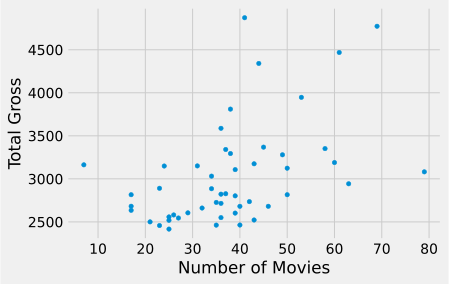

In [7]:
actors.plot(kind='scatter', x='Number of Movies', y='Total Gross');

### Scatter plots

- Scatter plots visualize the relationship between two numerical variables.
- To create one from a DataFrame `df`, use
```
df.plot(
    kind='scatter', 
    x=x_column_for_horizontal, 
    y=y_column_for_vertical
)
```
- The resulting scatter plot has one point per row of `df`.
- If you put a semicolon after a call to `.plot`, it will hide the weird text output that displays.

### Scatter plots

What is the relationship between `'Number of Movies'` and `'Average per Movie'`?

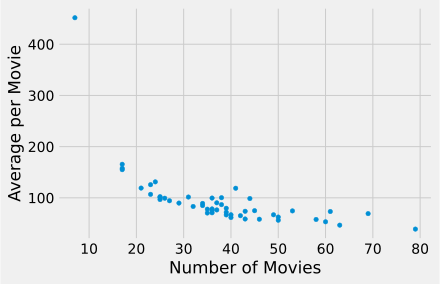

In [8]:
actors.plot(kind='scatter', x='Number of Movies', y='Average per Movie');

**What do you notice about the above plot?**

- There's a _negative_ association.

- There's an outlier.

### Who was in 60 or more movies?

In [9]:
actors[actors.get('Number of Movies') >= 60]

,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Actor,,,,,
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Bruce Willis,3189.4,60,53.2,Sixth Sense,293.5
Robert DeNiro,3081.3,79,39.0,Meet the Fockers,279.3
Liam Neeson,2942.7,63,46.7,The Phantom Menace,474.5


### Who is the outlier?

Whoever they are, they made very few, high grossing movies.

In [10]:
actors[actors.get('Number of Movies') < 10]

,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Actor,,,,,
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


### Anthony Daniels

<center><img src='data/c3po.png' width=200></center>

## Line plots 📉

### New dataset aggregating movies by year

|Column|	Content|
|------|-----------|
Year|	Year
Total Gross|	Total domestic box office gross, in millions of dollars, of all movies released
Number of Movies|	Number of movies released
#1 Movie|	Highest grossing movie

In [11]:
movies_by_year = bpd.read_csv('data/movies_by_year.csv').set_index('Year')
movies_by_year

,Total Gross,Number of Movies,#1 Movie
Year,,,
2015,11128.5,702,Star Wars: The Force Awakens
2014,10360.8,702,American Sniper
2013,10923.6,688,Catching Fire
...,...,...,...
1982,3453.0,428,E.T.
1981,2966.0,173,Raiders / Lost Ark
1980,2749.0,161,The Empire Strikes Back


### Line plots

- How has the number of movies changed over time? 🤔

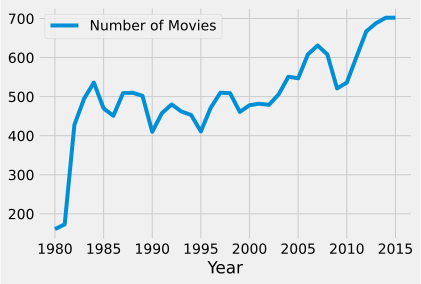

In [12]:
movies_by_year.plot(kind='line', y='Number of Movies');

### Line plots

- Line plots show trends in numerical variables over time.
- To create one from a DataFrame `df`, use
```
df.plot(
    kind='line', 
    x=x_column_for_horizontal, 
    y=y_column_for_vertical
)
```

### Plotting tip

- **Tip**: if you want the x-axis to be the index, omit the `x=` argument!
- Doesn't work for scatter plots, but works for most other plot types.

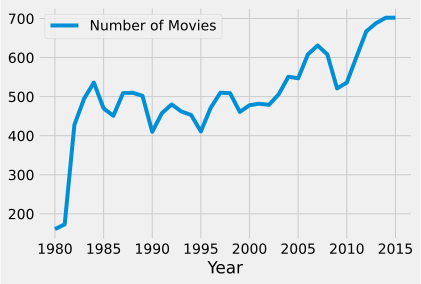

In [13]:
movies_by_year.plot(kind='line', y='Number of Movies');

### Focus on 2000-2015

We can create a line plot of just 2000 to 2015 by querying `movies_by_year` before calling `.plot`.

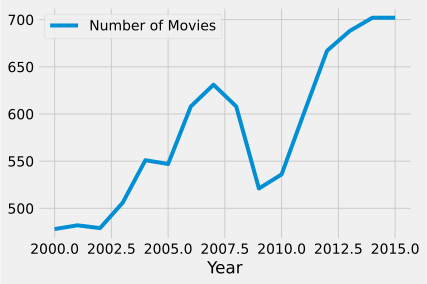

In [14]:
movies_by_year[movies_by_year.index >= 2000].plot(kind='line', y='Number of Movies');

Why is there a big drop between 2007 and 2009?

### How did this affect total gross?

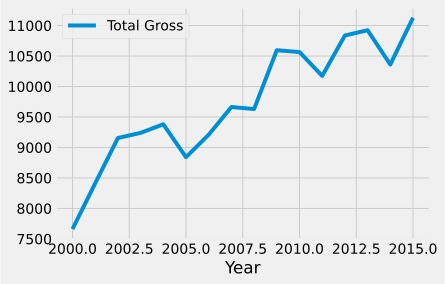

In [15]:
movies_by_year[movies_by_year.index >= 2000].plot(kind='line', y='Total Gross');

<div class="menti">
<div>

### Trivia: what was the top grossing movie of 2009?

A. Avatar

B. Harry Potter and the Half-Blood Prince

C. The Hangover

D. Up

</div>
<div>

### To answer, go to **[menti.com](https://www.menti.com/v42ge81t5d)** and enter the code 2863 3386 or use this QR code:

![](images/menti-qr.png)
    
</div>
</div>

### Answer

In [16]:
movies_by_year.get("#1 Movie").loc[2009]

'Avatar'

## Bar charts 📊

### Dataset of the top 200 songs on Spotify as of Monday (7/11/22)

[Downloaded from here – check it out!](https://spotifycharts.com/regional)

In [17]:
charts = (bpd.read_csv('data/regional-global-daily-latest.csv')
          .set_index('rank')
          .get(['track_name', 'artist_names', 'streams', 'uri'])
         )
charts

,track_name,artist_names,streams,uri
rank,,,,
1,Running Up That Hill (A Deal With God) - 2018 ...,Kate Bush,6225254,spotify:track:75FEaRjZTKLhTrFGsfMUXR
2,As It Was,Harry Styles,5937702,spotify:track:4Dvkj6JhhA12EX05fT7y2e
3,Me Porto Bonito,"Bad Bunny, Chencho Corleone",5199791,spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx
...,...,...,...,...
198,Balanço da Rede,"Matheus Fernandes, Xand Avião",732515,spotify:track:2qmG7dokbGpDGD0T5wORWt
199,There's Nothing Holdin' Me Back,Shawn Mendes,730894,spotify:track:7JJmb5XwzOO8jgpou264Ml
200,Nos Comemos (feat. Ozuna),"Tiago PZK, Ozuna",728521,spotify:track:6ojZtz3sZr6ynvejLOqgCj


### Bar charts

How many streams do the top 10 songs have?

In [18]:
charts.take(np.arange(10))

,track_name,artist_names,streams,uri
rank,,,,
1,Running Up That Hill (A Deal With God) - 2018 ...,Kate Bush,6225254,spotify:track:75FEaRjZTKLhTrFGsfMUXR
2,As It Was,Harry Styles,5937702,spotify:track:4Dvkj6JhhA12EX05fT7y2e
3,Me Porto Bonito,"Bad Bunny, Chencho Corleone",5199791,spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx
...,...,...,...,...
8,Efecto,Bad Bunny,3555407,spotify:track:5Eax0qFko2dh7Rl2lYs3bx
9,Moscow Mule,Bad Bunny,3181322,spotify:track:6Xom58OOXk2SoU711L2IXO
10,Left and Right (Feat. Jung Kook of BTS),"Charlie Puth, BTS, Jung Kook",2953419,spotify:track:0mBP9X2gPCuapvpZ7TGDk3


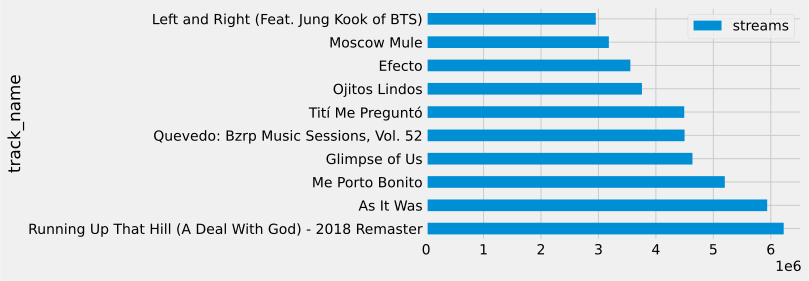

In [19]:
charts.take(np.arange(10)).plot(kind='barh', x='track_name', y='streams');

### Bar charts

- Bar charts visualize the relationship between a categorical variable and a numerical variable.
- In a bar chart...
    - The thickness and spacing of bars is arbitrary.
    - The order of the categorical labels doesn't matter.
- To create one from a DataFrame `df`, use
```
df.plot(
    kind='barh', 
    x=categorical_column_name, 
    y=numerical_column_name
)
```
- The **"h"** in `'barh'` stands for **"horizontal"**.
    - It's easier to read labels this way.
- In the previous chart, we set `y='Streams'` even though streams are measured by x-axis length.

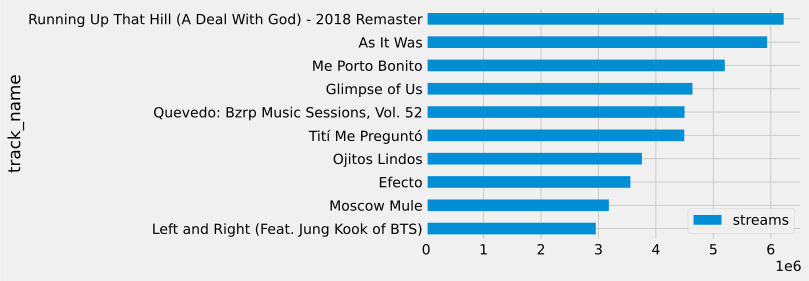

In [20]:
# The bars appear in the opposite order relative to the DataFrame
(charts
 .take(np.arange(10))
 .sort_values(by='streams')
 .plot(kind='barh', x='track_name', y='streams')
);

### How many songs do the top 15 artists have in the top 200?

In [21]:
# Create a DataFrame with a single column that describes the number of songs in the top 200 per artist.
# Keep only the top 15 artists.

top_15_artists = (charts
                  .groupby('artist_names') 
                  .count() 
                  .sort_values(by='streams', ascending=False) 
                  .take(np.arange(15)) 
                  .get(['streams']))
top_15_artists

,streams
artist_names,
Bad Bunny,14
Harry Styles,6
The Weeknd,5
...,...
OneRepublic,2
Steve Lacy,2
Måneskin,2


In [22]:
# Relabel the column in top_15_artists to be Count.

top_15_artists = (top_15_artists
                  .assign(count=top_15_artists.get('streams'))
                  .drop(columns=['streams']))
top_15_artists

,count
artist_names,
Bad Bunny,14
Harry Styles,6
The Weeknd,5
...,...
OneRepublic,2
Steve Lacy,2
Måneskin,2


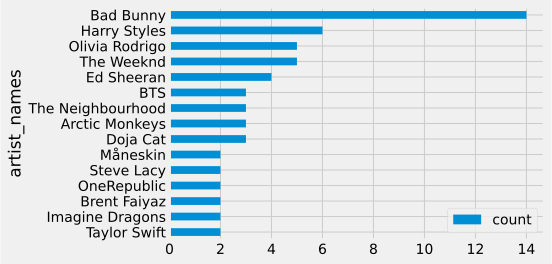

In [23]:
# Again, weirdly, we have to sort in **ascending** order because
# Python reverses the order of the rows before creating bars
# (Only applies to horizontal bar charts)

top_15_artists.sort_values(by='count').plot(kind='barh', y='count');

### Vertical bar charts

- Use `kind='bar'` instead of `kind='barh'`.

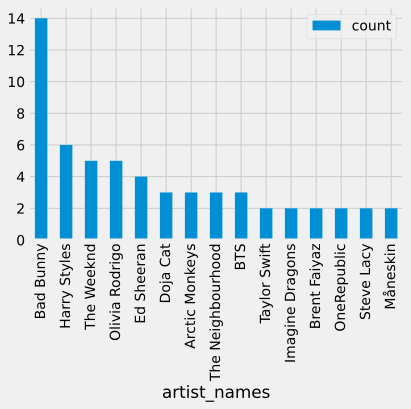

In [24]:
top_15_artists.plot(kind='bar', y='count');

<div class="menti">
<div>

### Discussion Question

Suppose we run the following block of code. What does the resulting bar chart tell us?

```py
(charts.groupby('artist_names').sum() 
 .sort_values(by='Streams', ascending=False) 
 .take(np.arange(10)) 
 .sort_values(by='Streams') 
 .plot(kind='barh', y='Streams'));
```

A. The number of total streams for the top 10 artists in the charts.

B. The number of total streams for the bottom 10 artists in the charts.

C. The number of total streams for the top 10 songs in the charts.

D. The number of total streams for the bottom 10 songs in the charts.

E. Something else entirely.

</div>
<div>

### To answer, go to **[menti.com](https://www.menti.com/v42ge81t5d)** and enter the code 2863 3386 or use this QR code:

![](images/menti-qr.png)
    
</div>
</div>

### How many streams did Justin Bieber's songs on the chart receive?

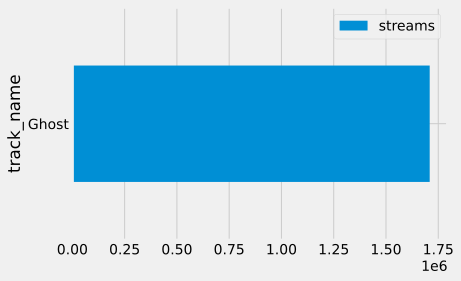

In [25]:
(charts
 [charts.get('artist_names') == 'Justin Bieber']
 .sort_values('streams')
 .plot(kind='barh', x='track_name', y='streams')
);

It seems like we're missing a few popular songs...

### How do we include featured songs, as well?

Answer: Using `.str.contains`.

In [26]:
bieber = charts[charts.get('artist_names').str.contains('Justin Bieber')]
bieber

,track_name,artist_names,streams,uri
rank,,,,
18,STAY (with Justin Bieber),"The Kid LAROI, Justin Bieber",2230029,spotify:track:5PjdY0CKGZdEuoNab3yDmX
30,Ghost,Justin Bieber,1709072,spotify:track:6I3mqTwhRpn34SLVafSH7G
137,Peaches (feat. Daniel Caesar & Giveon),"Justin Bieber, Daniel Caesar, Giveon",856695,spotify:track:4iJyoBOLtHqaGxP12qzhQI


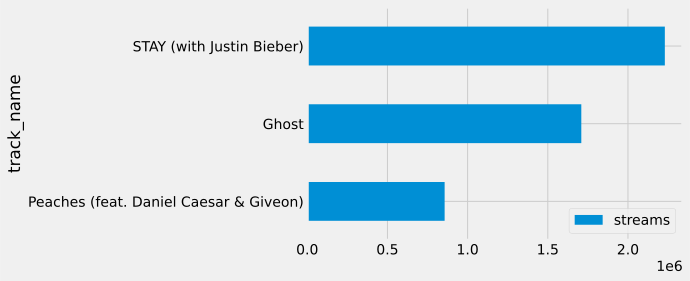

In [27]:
bieber.sort_values('streams').plot(kind='barh', x='track_name', y='streams');

## Fun demo 🎵

In [28]:
# Run this cell, don't worry about what it does
def show_spotify(url):
    code = url[url.rfind(':')+1:]
    src = f"https://open.spotify.com/embed/track/{code}"
    width = 400
    height = 75
    display(IFrame(src, width, height))

#### Let's find the URL of a song we care about.

In [29]:
%%pt
charts

In [30]:
favorite_song = "Potion (with Dua Lipa & Young Thug)"

In [31]:
song_url = (charts
            [charts.get('track_name') == favorite_song]
            .get('uri')
            .iloc[0])
song_url

'spotify:track:7fYRg3CEbk6rNCuzNzMT06'

Watch what happens! 🎶

In [32]:
show_spotify(song_url);

Try it out yourself!

## Summary

### Summary

- Visualizations make it easy to extract patterns from datasets.
- There are two main types of variables, categorical and numerical.
- The types of the variables we're visualizing inform our choice of which type of visualization to use.
- Today, we looked at scatter plots, line plots, and bar charts.
- **Next time:** Histograms and overlaid plots.